In [ ]:
import praw
import pandas as pd

# Initialize PRAW with your Reddit API credentials
reddit = praw.Reddit(
    client_id="w6Jr0IG2zDJtWB2qBBuJUA",
    client_secret="MmyRwAMJPX-9YNNUwjhKbN-VPJD4Iw",
    user_agent="MyRedditScraper by /u/Mysterious-Round-810",
)

def scrape_subreddit(subreddit_name, num_posts):
    data = []
    # Fetch the specified subreddit
    subreddit = reddit.subreddit(subreddit_name)

    # Fetch the top 'num_posts' posts from the subreddit
    top_posts = subreddit.top(limit=num_posts)

    # Iterate through the top posts and store their titles, scores, number of comments, and content
    for post in top_posts:
        post_data = {
            "Title": post.title,
            "Score": post.score,
            "Content": post.selftext if post.selftext else None,
            "Number of Comments": post.num_comments,
            "Post URL": post.url,
            "Full URL": f"https://www.reddit.com{post.permalink}",
        }
        data.append(post_data)

    return data

list_of_subreddits = ["Art", "StableDiffusion", "ArtificialInteligence", "AiArt", "graphic_design", "DigitalArt", "ArtHistory", "drawing", "learnart", "Illustration"]

# Scrape the subreddits
data = []
num_posts = 1000
scraped_data = []

for i in list_of_subreddits:
    scraped_data = scrape_subreddit(i, num_posts)
    data.extend(scraped_data)

df = pd.DataFrame(data)

# Print first 10 observations
print(df.head(10))

C:\Users\Joaquin\AppData\Local\Temp\ipykernel_20380\1478624560.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


                                               Title  Score Content  \
0             Somewhere in Alsace, me, acrylic, 2022  42071    None   
1        Midsummer, Djamila Knopf, Digital art, 2019  42060    None   
2  Boy Behind The Mask, Sarah Weaver, acrylic on ...  42034    None   
3                  The Catch, me, oil on panel, 2021  42009    None   
4               Alchemy, voxel animation, 540x540 px  42010    None   
5                Doorway Protocol, Me, Digital, 2020  41994    None   
6                       Brave Warrior, Digital, 2017  42001    None   
7                Stained Glass Sidewalk (2017) Chalk  41957    None   
8                 Honey Bear, me, oil on panel, 2020  41942    None   
9                     Double Shot, Me, Digital, 2021  41923    None   

   Number of Comments                                           Post URL  \
0                 632                https://i.redd.it/rwqyfwka0ny81.jpg   
1                 305                https://i.redd.it/9eehb9wloo7

In [ ]:
print(len(df))

9924


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download the stopwords and stemmer
nltk.download('punkt')
nltk.download('stopwords')

# Define stopwords and stemmer
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

# Define a function to preprocess text
def preprocess_text(text):
    if isinstance(text, str):
        # Tokenize the text
        tokens = word_tokenize(text)
        # Convert tokens to lowercase and remove non-alphanumeric characters
        tokens = [token.lower() for token in tokens if token.isalnum()]
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]
        # Initialize Porter Stemmer
        porter = PorterStemmer()
        # Stem the tokens
        stemmed_tokens = [porter.stem(word) for word in tokens]
        return stemmed_tokens
    else:
        return []  # Return an empty list for NaN values

# Apply preprocessing to the 'text' column
df['preprocessed_text'] = df['Title'].apply(preprocess_text)

# Print some observations to highlight the pre-processed text
for i in range(5):
    print(f'Original Text: {df["Title"][i]}')
    print(f'Preprocessed Text: {df["preprocessed_text"][i]}\n')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Joaquin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Joaquin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Original Text: Somewhere in Alsace, me, acrylic, 2022
Preprocessed Text: ['somewher', 'alsac', 'acryl', '2022']

Original Text: Midsummer, Djamila Knopf, Digital art, 2019
Preprocessed Text: ['midsumm', 'djamila', 'knopf', 'digit', 'art', '2019']

Original Text: Boy Behind The Mask, Sarah Weaver, acrylic on gessoed illustration board, 18'' x 24''
Preprocessed Text: ['boy', 'behind', 'mask', 'sarah', 'weaver', 'acryl', 'gesso', 'illustr', 'board', '18', 'x', '24']

Original Text: The Catch, me, oil on panel, 2021
Preprocessed Text: ['catch', 'oil', 'panel', '2021']

Original Text: Alchemy, voxel animation, 540x540 px
Preprocessed Text: ['alchemi', 'voxel', 'anim', '540x540', 'px']



In [ ]:
import gensim
from gensim import corpora

# Create a dictionary and corpus
dictionary = corpora.Dictionary(df['preprocessed_text'])

# Create a bag of words representation of the data
corpus = [dictionary.doc2bow(tokens) for tokens in df['preprocessed_text']]

# Filter out words that appear in more than a certain percentage of documents
dictionary.filter_extremes(no_above=0.5)  # Adjust the threshold as needed

# Reassign IDs after filtering
dictionary.compactify()

# Update the corpus with the filtered dictionary
corpus = [dictionary.doc2bow(tokens) for tokens in df['preprocessed_text']]


# Create the LDA model
num_topics = 20

lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=15)

# Display the topics and the top 7 words for each topic
topics = lda_model.print_topics(num_words=7)
for topic in topics:
    print(topic)

(0, '0.116*"ai" + 0.057*"use" + 0.042*"gener" + 0.042*"imag" + 0.040*"piec" + 0.026*"video" + 0.026*"diffus"')
(1, '0.085*"look" + 0.070*"like" + 0.065*"know" + 0.063*"post" + 0.058*"improv" + 0.050*"peopl" + 0.033*"thank"')
(2, '0.190*"design" + 0.044*"1" + 0.041*"black" + 0.041*"graphic" + 0.039*"month" + 0.033*"call" + 0.033*"cover"')
(3, '0.196*"made" + 0.111*"portrait" + 0.076*"sketch" + 0.041*"done" + 0.033*"fun" + 0.026*"name" + 0.026*"quick"')
(4, '0.155*"work" + 0.080*"day" + 0.078*"practic" + 0.057*"recent" + 0.047*"attempt" + 0.033*"happi" + 0.024*"result"')
(5, '0.211*"studi" + 0.055*"hour" + 0.040*"2" + 0.037*"turn" + 0.036*"photo" + 0.034*"week" + 0.031*"night"')
(6, '0.251*"art" + 0.085*"progress" + 0.068*"paper" + 0.056*"today" + 0.052*"pen" + 0.040*"artwork" + 0.035*"anoth"')
(7, '0.085*"2022" + 0.079*"2021" + 0.065*"digit" + 0.052*"help" + 0.037*"vs" + 0.032*"alway" + 0.028*"x"')
(8, '0.077*"2020" + 0.066*"guy" + 0.063*"watercolor" + 0.057*"thought" + 0.056*"littl" + 

In [ ]:
import pyLDAvis.gensim

# Prepare the visualization data
vis_data = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

# Display the visualization
pyLDAvis.display(vis_data)

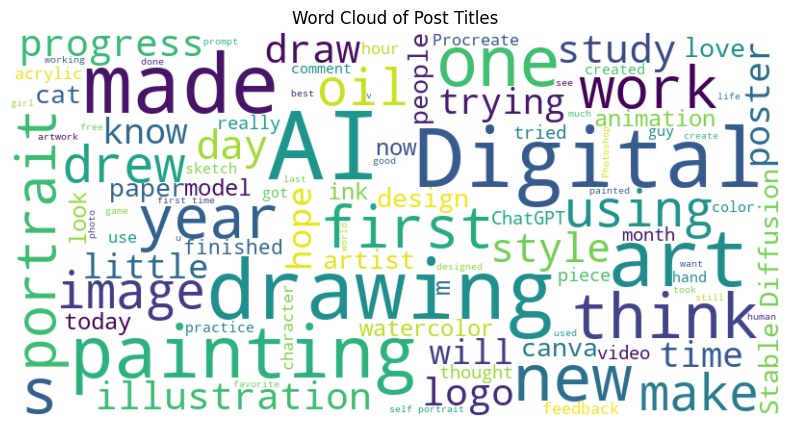

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Concatenate all the post titles into a single string
text = " ".join(title for title in df["Title"])

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, max_font_size=100, max_words=100, background_color="white").generate(text)

# Display the word cloud visualization
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word Cloud of Post Titles")
plt.axis("off")
plt.show()

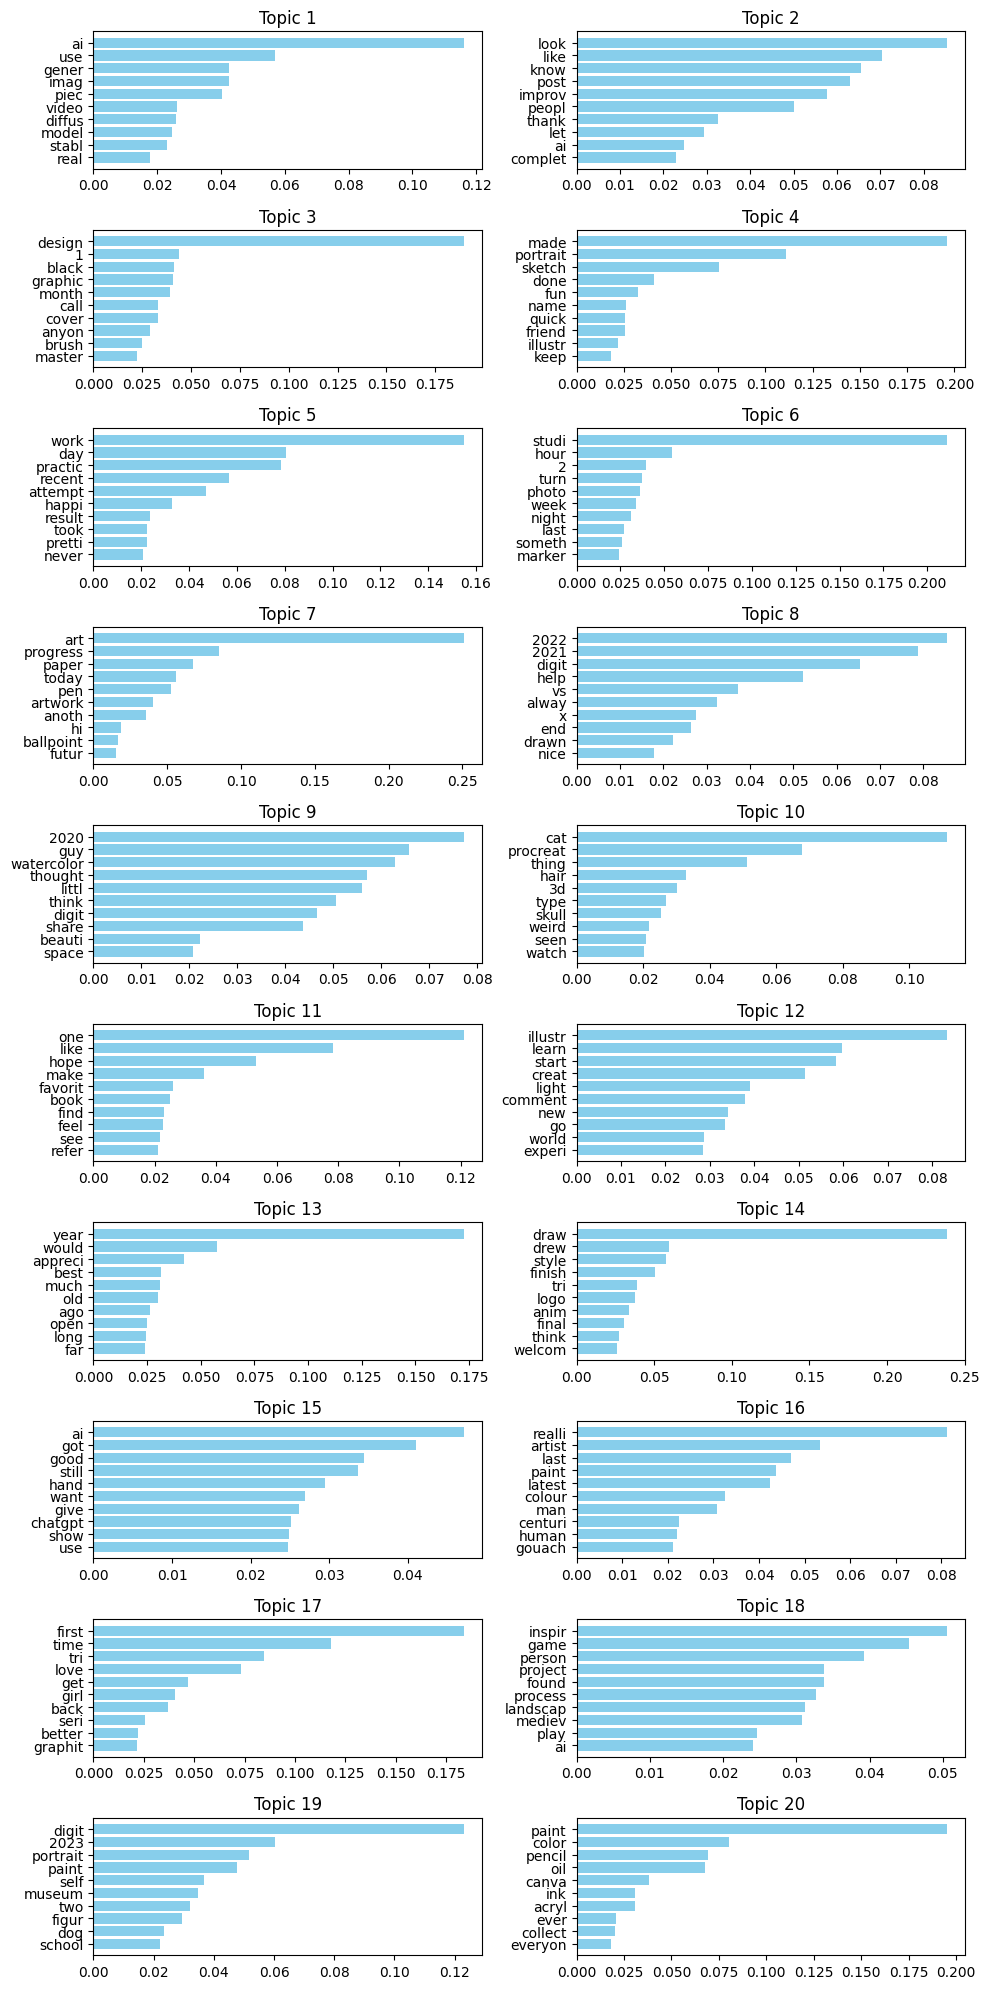

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Define the number of top words to display for each topic
n_top_words = 10

# Create a PDF to save the plot
with PdfPages('topics_and_top_words.pdf') as pdf:
    # Create subplots for each topic
    plt.figure(figsize=(10, 20))
    for topic_idx, topic in lda_model.show_topics(num_topics=num_topics, num_words=n_top_words, formatted=False):
        top_words = [word for word, _ in topic]
        top_word_probs = [prob for _, prob in topic]

        # Plot the top words for the current topic
        plt.subplot(10, 2, topic_idx + 1)  # Assuming 20 topics, change the numbers accordingly
        plt.barh(top_words, top_word_probs, color='skyblue')
        plt.gca().invert_yaxis()  # Invert y-axis for better readability
        plt.title(f'Topic {topic_idx + 1}', fontsize=12)

    # Add space between subplots
    plt.tight_layout()

    # Save the plot to the PDF
    pdf.savefig()

    # Show the plot
    plt.show()

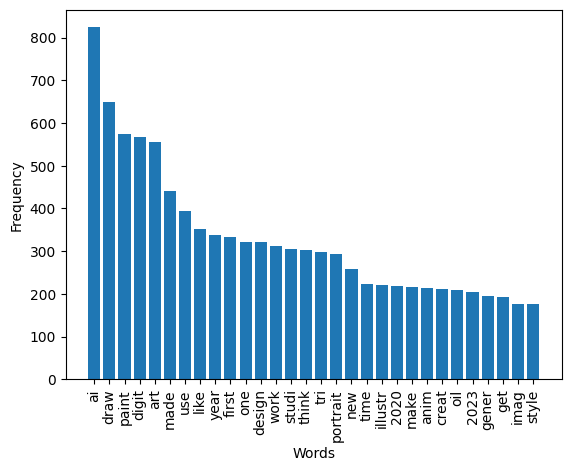

In [ ]:
from collections import Counter
word_count = Counter([word for doc in df["preprocessed_text"] for word in doc])
most_common = word_count.most_common(30)
most_common = dict(most_common)
plt.bar(most_common.keys(), most_common.values())
plt.xticks(rotation=90)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

In [ ]:
from collections import Counter

word_count = Counter([word for doc in df["preprocessed_text"] for word in doc])
most_common = word_count.most_common(50)

i = 1
for word, freq in most_common:
    print(i, f"{word}: {freq} occurrences")
    i = i + 1

words = [word for word, freq in reversed(most_common)]
frequencies = [freq for word, freq in reversed(most_common)]

plt.figure(figsize=(6, 8))
plt.barh(words, frequencies)
plt.xticks(rotation=0)
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title('Top 50 Most Frequent Words')
plt.tight_layout()
plt.show()